In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [262]:
import warnings
warnings.filterwarnings('ignore')

In [263]:
df = pd.read_csv('glassdoor_jobs.csv')

In [264]:
df.shape

(956, 15)

In [265]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [266]:
df.dtypes

Unnamed: 0             int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
dtype: object

In [267]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


In [269]:
#Note: No feature has NaN values, but there may be the case where the NaN values are replaced by some other value(s) like -1, 0.

In [270]:
df.describe()

,Unnamed: 0,Rating,Founded
count,956.000000,956.000000,956.000000
mean,477.500000,3.601255,1774.605649
std,276.117729,1.067619,598.942517
min,0.000000,-1.000000,-1.000000
25%,238.750000,3.300000,1937.000000
50%,477.500000,3.800000,1992.000000
75%,716.250000,4.200000,2008.000000
max,955.000000,5.000000,2019.000000


Exploratory Data Analysis & Data Cleaning

In [271]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [272]:
df.shape

(956, 14)

Text(0.5, 1.0, 'before removing -1 values')

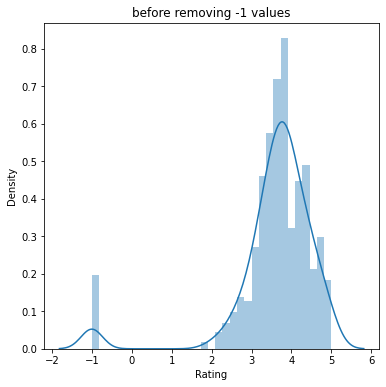

In [273]:
plt.figure(figsize=(6,6))
sns.distplot(a=df['Rating'])
plt.title('before removing -1 values')

In [274]:
#Note: Since the Rating feature follows the Gaussian/Normal Distribution, we'll replace -1 values with mean of the distribution.

Text(0.5, 1.0, 'after removing -1 values')

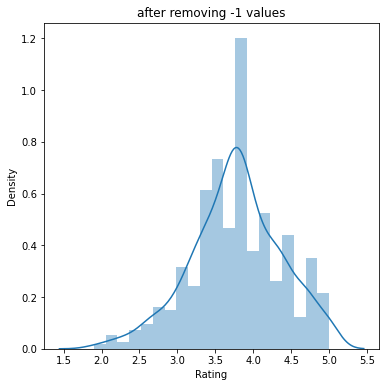

In [275]:
df['Rating'] = df['Rating'].apply(lambda x: np.NaN if x==-1 else x)
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())
plt.figure(figsize=(6,6))
sns.distplot(a=df['Rating'])
plt.title('after removing -1 values')

Text(0, 0.5, 'ratings')

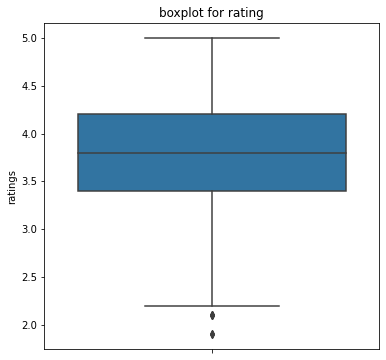

In [276]:
plt.figure(figsize=(6,6))
sns.boxplot(y='Rating',data=df)
plt.title('boxplot for rating')
plt.ylabel('ratings')

Text(0.5, 1.0, 'Before removing -1 value')

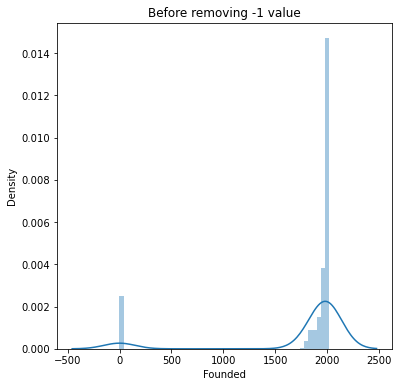

In [277]:
plt.figure(figsize=(6,6))
sns.distplot(df['Founded'])
plt.title('Before removing -1 value')

In [278]:
#Founded feature does not follow Gaussian/Normal distribution, we'll replacing the -1 values with median of the distribution.

Text(0.5, 1.0, 'After removing -1 value')

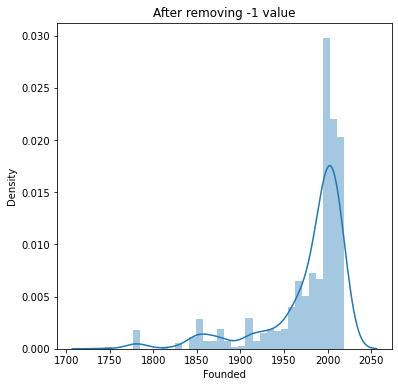

In [279]:
df['Founded'] = df['Founded'].apply(lambda x: np.NaN if x==-1 else x)
df['Founded'] = df['Founded'].fillna(int(df['Founded'].median()))
df['Founded'] = df['Founded'].astype('int')

plt.figure(figsize=(6,6))
sns.distplot(df['Founded'])
plt.title('After removing -1 value')

Text(0, 0.5, 'Founded year')

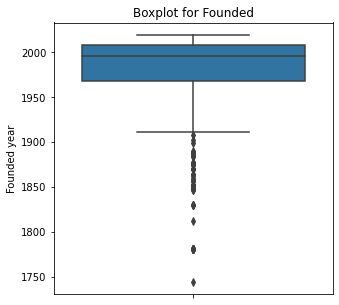

In [280]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Founded', data=df)
plt.title('Boxplot for Founded')
plt.ylabel('Founded year')

In [281]:
df['Job Title'].unique()

array(['Data Scientist', 'Healthcare Data Scientist',
       'Research Scientist', 'Staff Data Scientist - Technology',
       'Data Analyst', 'Data Engineer I', 'Scientist I/II, Biology',
       'Customer Data Scientist',
       'Data Scientist - Health Data Analytics',
       'Senior Data Scientist / Machine Learning',
       'Data Scientist - Quantitative', 'Digital Health Data Scientist',
       'Associate Data Analyst', 'Clinical Data Scientist',
       'Data Scientist / Machine Learning Expert', 'Web Data Analyst',
       'Senior Data Scientist', 'Data Engineer',
       'Data Scientist - Algorithms & Inference', 'Scientist',
       'Data Science Analyst', 'Lead Data Scientist',
       'Spectral Scientist/Engineer',
       'College Hire - Data Scientist - Open to December 2019 Graduates',
       'Data Scientist, Office of Data Science',
       'Business Intelligence Analyst', 'Senior Risk Data Scientist',
       'Data Scientist in Artificial Intelligence Early Career',
       'Dat

In [282]:
df['Job Title'].value_counts().nlargest(20)

Data Scientist                                            178
Data Engineer                                              68
Senior Data Scientist                                      42
Data Analyst                                               18
Senior Data Engineer                                       17
Business Intelligence Analyst                              13
Senior Data Analyst                                        12
Lead Data Scientist                                         8
Data Science Manager                                        7
Principal Data Scientist                                    6
Machine Learning Engineer                                   6
Marketing Data Analyst                                      6
Sr. Data Engineer                                           6
Analytics Manager                                           5
Lead Data Engineer                                          5
Data Engineer 5 - Contract                                  4
Pharmaco

In [283]:
def title_cleaner(title):
    if 'data scientist' in title.lower() or 'scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'other'
    
df['job title'] = df['Job Title'].apply(title_cleaner)
df['job title'].value_counts()

data scientist    560
data engineer     158
data analyst      105
other              72
manager            35
director           13
mle                13
Name: job title, dtype: int64

[Text(0, 0, 'data scientist'),
 Text(1, 0, 'data engineer'),
 Text(2, 0, 'data analyst'),
 Text(3, 0, 'other'),
 Text(4, 0, 'manager'),
 Text(5, 0, 'director'),
 Text(6, 0, 'mle')]

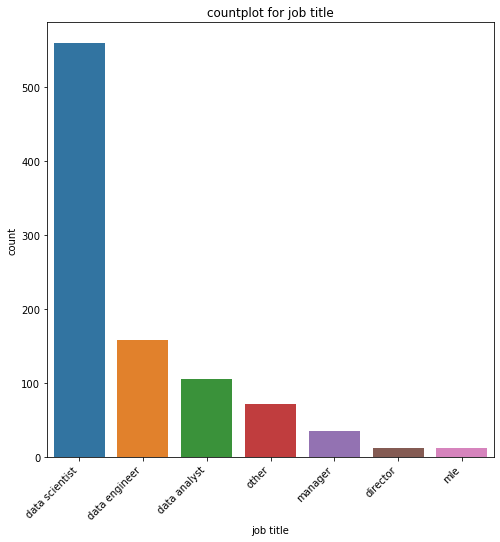

In [284]:
plt.figure(figsize=(8,8))
g=sns.countplot(x='job title',data=df,order=df['job title'].value_counts().index)
plt.title('countplot for job title')
plt.xlabel('job title')
plt.ylabel('count')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [285]:
def title_seniority(title):
    if 'sr.' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'sr'
    elif 'junior' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'other'
    
df['job seniority'] = df['Job Title'].apply(title_seniority)
df['job seniority'].value_counts()

other    701
sr       252
jr         3
Name: job seniority, dtype: int64

Text(0, 0.5, 'count')

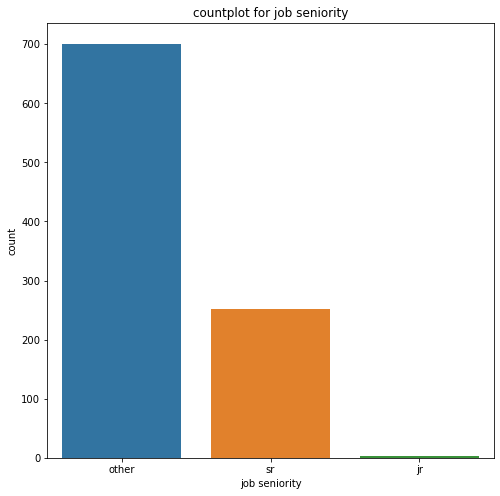

In [286]:
plt.figure(figsize=(8,8))
sns.countplot(x='job seniority',data=df,order=df['job seniority'].value_counts().index)
plt.title('countplot for job seniority')
plt.xlabel('job seniority')
plt.ylabel('count')

In [287]:
df.drop(labels=['Job Title'], axis=1, inplace=True)

In [288]:
salary = df['Salary Estimate'].apply(lambda x: x.split("(")[0])
salary

0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
951    $72K-$133K 
952     $56K-$91K 
953    $95K-$160K 
954             -1
955    $61K-$126K 
Name: Salary Estimate, Length: 956, dtype: object

In [289]:
salary.value_counts()

-1                  214
$86K-$143K            6
$54K-$115K            6
$49K-$113K            6
$21-$34 Per Hour      6
                   ... 
$74K-$119K            1
$55K-$97K             1
$15K-$16K             1
$61K-$106K            1
$62K-$113K            1
Name: Salary Estimate, Length: 417, dtype: int64

In [290]:
salary = salary.apply(lambda x: np.NaN if x=='-1' else x)
salary

0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
951    $72K-$133K 
952     $56K-$91K 
953    $95K-$160K 
954            NaN
955    $61K-$126K 
Name: Salary Estimate, Length: 956, dtype: object

In [291]:
salary = salary.apply(lambda x: x if type(x)==type(2.5) else x.replace('$','').replace('K',''))

In [292]:
salary

0       53-91 
1      63-112 
2       80-90 
3       56-97 
4      86-143 
        ...   
951    72-133 
952     56-91 
953    95-160 
954        NaN
955    61-126 
Name: Salary Estimate, Length: 956, dtype: object

In [293]:
len(salary.unique())

417

In [294]:
salary.unique()

array(['53-91 ', '63-112 ', '80-90 ', '56-97 ', '86-143 ', '71-119 ',
       '54-93 ', '86-142 ', '38-84 ', '120-160 ', '126-201 ', '64-106 ',
       '106-172 ', '46-85 ', '83-144 ', '102-190 ', '67-137 ', '118-189 ',
       '110-175 ', '64-111 ', '81-130 ', '73-119 ', '86-139 ', '63-105 ',
       nan, '109-177 ', '63-110 ', '75-124 ', '34-61 ', '72-120 ',
       '93-149 ', '85-140 ', '77-135 ', '82-132 ', '83-137 ', '115-180 ',
       '74-138 ', '64-112 ', '68-129 ', '52-113 ', '110-150',
       'Employer Provided Salary:150-160', '158-211 ', '20-39 ',
       '56-117 ', '63-99 ', '68-114 ', '41-95 ', '86-144 ', '80-139 ',
       '56-95 ', '120-189 ', '111-176 ', '84-146 ', '107-172 ', '49-85 ',
       '61-109 ', '88-148 ', '60-99 ', '41-72 ', '96-161 ', '65-130 ',
       '52-81 ', '139-220 ', '50-102 ', '85-139 ', '74-122 ', '99-157 ',
       '79-222 ', '57-118 ', '86-141 ', '94-154 ', '37-76 ', '100-160 ',
       '55-100 ', '60-114 ', '39-68 ', '64-107 ', '31-65 ', '34-62 ',
       '

In [295]:
#Converting per hour salaries to per year salaries (assuming 45 work hours per week and 52 working weeks),
#and removing employer_provided_salary from the salary array._

In [296]:
salary = salary.apply(lambda x: x if type(x)==type(3.5) else x.lower().replace('employer provided salary:',''))

In [297]:
salary.unique()[380:]

array(['42-79 ', '84-153 ', '44-73 ', '40-87 ', '72-142 ', '74-137 ',
       '57-109 ', '136-208 ', '171-272 ', '65-126 ', '118-228 ',
       '113-182 ', '58-104 ', '58-108 ', '81-161 ', '115-220 ', '71-144 ',
       '32-57 ', '79-136 ', '48-113 ', '27-47 per hour', '68-125 ',
       '39-67 ', '71-135 ', '61-123 ', '87-141 ', '71-121 ', '72-121 ',
       '51-88 ', '101-141 ', '79-127 ', '81-132 ', '120-140', '65-113 ',
       '59-125 ', '80-142 ', '62-113 '], dtype=object)

In [298]:
# Converting per hour salaries to per year salaries
def hourly_to_yearly(minlimit, maxlimit):
    x = minlimit.strip()
    y = maxlimit.strip()
    x = int(int(x)*45*52/1000)
    y = int(int(y)*45*52/1000)
    return '{}-{}'.format(x,y)

salary = salary.apply(lambda x: x if type(x)==type(3.5) else (hourly_to_yearly(x.lower().replace("per hour", "").split('-')[0],\
                                                                               x.lower().replace("per hour", "").split('-')[1]) \
                                                              if "per hour" in x.lower() else x))
salary.unique()[380:]
                                                              

array(['42-79 ', '84-153 ', '44-73 ', '40-87 ', '72-142 ', '74-137 ',
       '57-109 ', '136-208 ', '171-272 ', '65-126 ', '118-228 ',
       '113-182 ', '58-104 ', '58-108 ', '81-161 ', '115-220 ', '71-144 ',
       '32-57 ', '79-136 ', '48-113 ', '63-109', '68-125 ', '39-67 ',
       '71-135 ', '61-123 ', '87-141 ', '71-121 ', '72-121 ', '51-88 ',
       '101-141 ', '79-127 ', '81-132 ', '120-140', '65-113 ', '59-125 ',
       '80-142 ', '62-113 '], dtype=object)

In [299]:
salary.unique()

array(['53-91 ', '63-112 ', '80-90 ', '56-97 ', '86-143 ', '71-119 ',
       '54-93 ', '86-142 ', '38-84 ', '120-160 ', '126-201 ', '64-106 ',
       '106-172 ', '46-85 ', '83-144 ', '102-190 ', '67-137 ', '118-189 ',
       '110-175 ', '64-111 ', '81-130 ', '73-119 ', '86-139 ', '63-105 ',
       nan, '109-177 ', '63-110 ', '75-124 ', '34-61 ', '72-120 ',
       '93-149 ', '85-140 ', '77-135 ', '82-132 ', '83-137 ', '115-180 ',
       '74-138 ', '64-112 ', '68-129 ', '52-113 ', '110-150', '150-160',
       '158-211 ', '20-39 ', '56-117 ', '63-99 ', '68-114 ', '41-95 ',
       '86-144 ', '80-139 ', '56-95 ', '120-189 ', '111-176 ', '84-146 ',
       '107-172 ', '49-85 ', '61-109 ', '88-148 ', '60-99 ', '41-72 ',
       '96-161 ', '65-130 ', '52-81 ', '139-220 ', '50-102 ', '85-139 ',
       '74-122 ', '99-157 ', '79-222 ', '57-118 ', '86-141 ', '94-154 ',
       '37-76 ', '100-160 ', '55-100 ', '60-114 ', '39-68 ', '64-107 ',
       '31-65 ', '34-62 ', '117-231 ', '79-134 ', '52-93 ', 

In [300]:
df['Salary'] = salary.apply(lambda x: x if type(x)==type(2.5) else (int(x.split('-')[0])+int(x.split('-')[1]))/2)

In [301]:
df['Salary'].unique()[:5]

array([ 72. ,  87.5,  85. ,  76.5, 114.5])

Text(0.5, 1.0, 'before handling nan values')

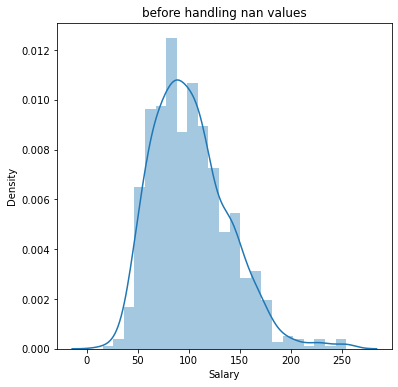

In [302]:
plt.figure(figsize=(6,6))
sns.distplot(a=df['Salary'])
plt.title('before handling nan values')

In [303]:
#since the Rating feature follows the Gaussian/Normal Distribution, but since there are few outlies, we'll replace -1 values
#with median of the distribution.

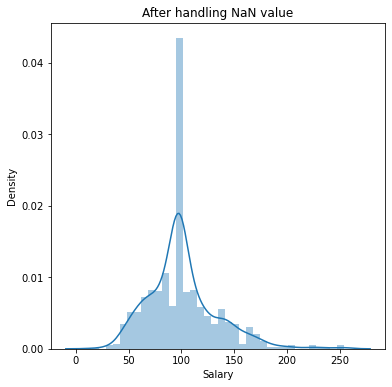

In [304]:
df['Salary'] = df['Salary'].fillna(df['Salary'].median())

plt.figure(figsize=(6,6))
g = sns.distplot(df['Salary'])
p = plt.title('After handling NaN value')

Text(0.5, 0, 'salary')

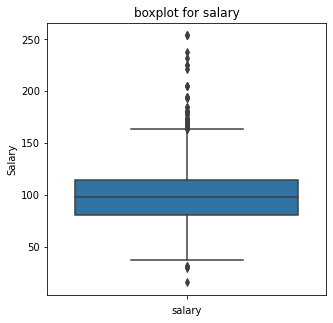

In [305]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Salary',data=df)
plt.title('boxplot for salary')
plt.xlabel('salary')

In [306]:
df["Company Name"] = df['Company Name'].apply(lambda x: x.split("\n")[0])

Text(0.5, 1.0, 'top 15 companies')

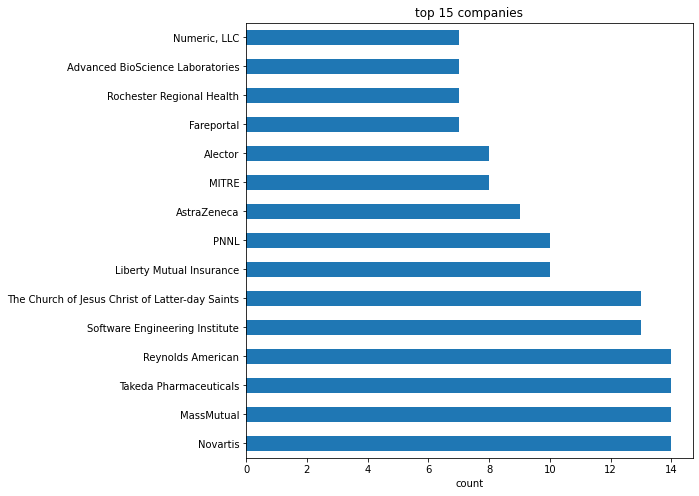

In [307]:
plt.figure(figsize=(8,8))
df['Company Name'].value_counts().nlargest(15).plot(kind='barh')
plt.xlabel('count')
plt.title('top 15 companies')

In [308]:
df['job location'] = df['Location'].apply(lambda x: x if ',' not in x else x.split(',')[1].strip())

In [309]:
df['job location'].unique()

array(['NM', 'MD', 'FL', 'WA', 'NY', 'TX', 'CA', 'VA', 'MA', 'NJ', 'CO',
       'IL', 'KY', 'Oregon', 'OR', 'CT', 'MI', 'AZ', 'DC', 'OH', 'AL',
       'MO', 'RI', 'PA', 'GA', 'New Jersey', 'IN', 'LA', 'WI', 'Virginia',
       'NC', 'MN', 'NE', 'Los Angeles', 'UT', 'TN', 'DE', 'ID', 'AK',
       'United States', 'IA', 'SC', 'KS', 'PR', 'Maryland', 'Michigan'],
      dtype=object)

In [310]:
len(df['job location'].unique())

46

Text(0.5, 0, 'Count')

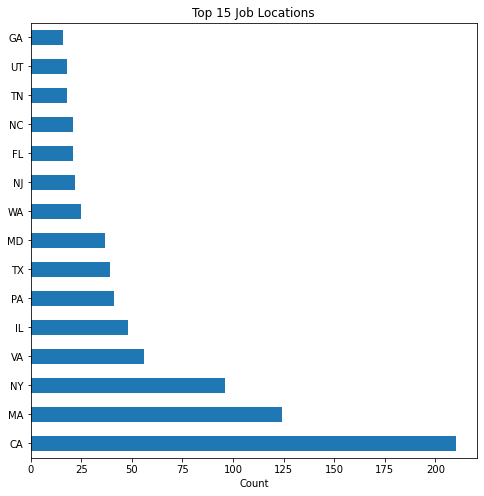

In [311]:
plt.figure(figsize=(8,8))
df["job location"].value_counts().nlargest(15).plot(kind='barh')
plt.title('Top 15 Job Locations')
plt.xlabel('Count')

In [312]:
df['Size'].value_counts()

1001 to 5000 employees     177
201 to 500 employees       160
51 to 200 employees        155
10000+ employees           154
501 to 1000 employees      144
5001 to 10000 employees     79
1 to 50 employees           61
Unknown                     15
-1                          11
Name: Size, dtype: int64

In [313]:
def size_simplifier(text):
    if '-1' in text.lower():
        return 'Unknown'
    else:
        return text

df['Size'] = df['Size'].apply(size_simplifier)

[Text(0, 0, '1001 to 5000 employees'),
 Text(1, 0, '201 to 500 employees'),
 Text(2, 0, '51 to 200 employees'),
 Text(3, 0, '10000+ employees'),
 Text(4, 0, '501 to 1000 employees'),
 Text(5, 0, '5001 to 10000 employees'),
 Text(6, 0, '1 to 50 employees'),
 Text(7, 0, 'Unknown')]

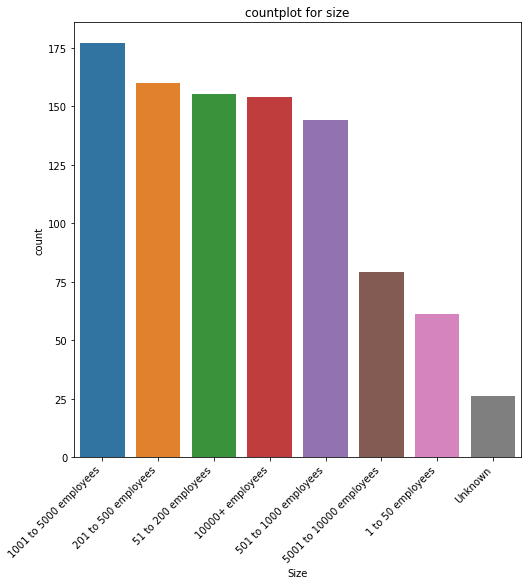

In [314]:
plt.figure(figsize=(8,8))
k=sns.countplot(x='Size',data=df,order=df['Size'].value_counts().index)
plt.title('countplot for size')
plt.ylabel('count')
k.set_xticklabels(k.get_xticklabels(),rotation=45,horizontalalignment='right')

In [315]:
df['Type of ownership'].value_counts()

Company - Private                 532
Company - Public                  237
Nonprofit Organization             65
Subsidiary or Business Segment     40
Government                         17
Hospital                           15
College / University               15
Unknown                            11
-1                                 11
Other Organization                  5
Contract                            5
School / School District            2
Private Practice / Firm             1
Name: Type of ownership, dtype: int64

In [316]:
def ownership_simplifier(text):
    if 'private' in text.lower():
        return 'Private'
    elif 'public' in text.lower():
        return 'Public'
    elif ('-1' in text.lower()) or ('unknown' in text.lower()) or ('school / school district' in text.lower()) or\
    ('private practice / firm' in text.lower()) or ('contract' in text.lower()) :
        return 'Other Organization'
    else:
        return text

df['Type of ownership'] = df['Type of ownership'].apply(ownership_simplifier)

[Text(0, 0, 'Private'),
 Text(1, 0, 'Public'),
 Text(2, 0, 'Nonprofit Organization'),
 Text(3, 0, 'Subsidiary or Business Segment'),
 Text(4, 0, 'Other Organization'),
 Text(5, 0, 'Government'),
 Text(6, 0, 'Hospital'),
 Text(7, 0, 'College / University')]

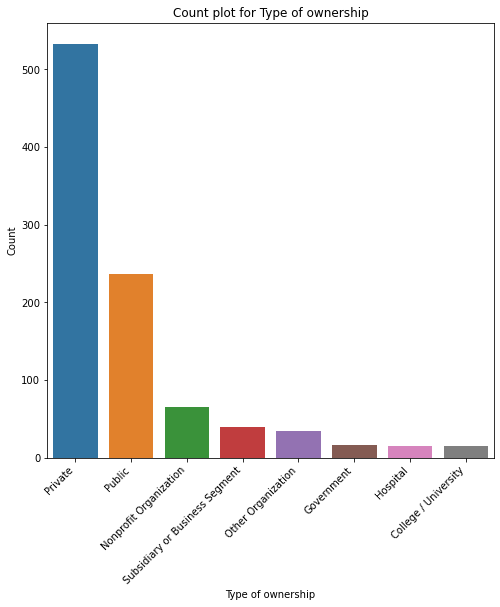

In [317]:
plt.figure(figsize=(8,8))
g=sns.countplot(x='Type of ownership', data=df, order = df['Type of ownership'].value_counts().index)
plt.title('Count plot for Type of ownership')
plt.xlabel('Type of ownership')
plt.ylabel('Count')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [318]:
df['Industry'].value_counts()

Biotech & Pharmaceuticals                   148
IT Services                                  77
Computer Hardware & Software                 70
Insurance Carriers                           65
Enterprise Software & Network Solutions      56
                                           ... 
Farm Support Services                         1
Transportation Equipment Manufacturing        1
Motion Picture Production & Distribution      1
Other Retail Stores                           1
Beauty & Personal Accessories Stores          1
Name: Industry, Length: 63, dtype: int64

In [319]:
df['Industry'] = df['Industry'].apply(lambda x: 'other' if x=='-1' else x)

[Text(0, 0, 'Biotech & Pharmaceuticals'),
 Text(1, 0, 'IT Services'),
 Text(2, 0, 'Computer Hardware & Software'),
 Text(3, 0, 'Insurance Carriers'),
 Text(4, 0, 'Enterprise Software & Network Solutions'),
 Text(5, 0, 'Health Care Services & Hospitals'),
 Text(6, 0, 'Staffing & Outsourcing'),
 Text(7, 0, 'other'),
 Text(8, 0, 'Internet'),
 Text(9, 0, 'Consulting'),
 Text(10, 0, 'Aerospace & Defense'),
 Text(11, 0, 'Advertising & Marketing'),
 Text(12, 0, 'Consumer Products Manufacturing'),
 Text(13, 0, 'Research & Development'),
 Text(14, 0, 'Banks & Credit Unions'),
 Text(15, 0, 'Colleges & Universities'),
 Text(16, 0, 'Lending'),
 Text(17, 0, 'Energy'),
 Text(18, 0, 'Religious Organizations'),
 Text(19, 0, 'Federal Agencies')]

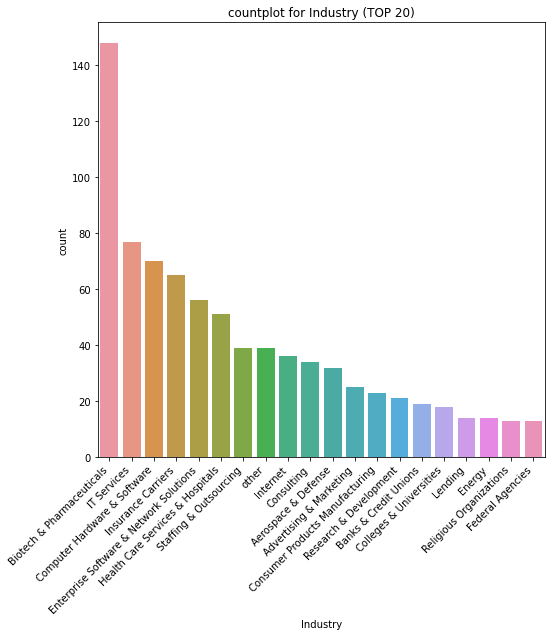

In [320]:
plt.figure(figsize=(8,8))
k = sns.countplot(x='Industry',data=df,order=df['Industry'].value_counts().index[:20])
plt.title('countplot for Industry (TOP 20)')
plt.ylabel('count')
k.set_xticklabels(k.get_xticklabels(),rotation=45,horizontalalignment='right')

In [321]:
df['Sector'].value_counts()

Information Technology                239
Biotech & Pharmaceuticals             148
Business Services                     134
Insurance                              71
Finance                                56
Health Care                            51
Manufacturing                          40
-1                                     39
Aerospace & Defense                    32
Education                              26
Retail                                 16
Non-Profit                             16
Oil, Gas, Energy & Utilities           15
Media                                  13
Government                             13
Transportation & Logistics              8
Real Estate                             8
Travel & Tourism                        8
Telecommunications                      6
Arts, Entertainment & Recreation        4
Construction, Repair & Maintenance      4
Consumer Services                       4
Mining & Metals                         3
Agriculture & Forestry            

In [322]:
df['Sector'] = df['Sector'].apply(lambda x: 'Others' if x=='-1' else x)

[Text(0, 0, 'Information Technology'),
 Text(1, 0, 'Biotech & Pharmaceuticals'),
 Text(2, 0, 'Business Services'),
 Text(3, 0, 'Insurance'),
 Text(4, 0, 'Finance'),
 Text(5, 0, 'Health Care'),
 Text(6, 0, 'Manufacturing'),
 Text(7, 0, 'Others'),
 Text(8, 0, 'Aerospace & Defense'),
 Text(9, 0, 'Education'),
 Text(10, 0, 'Retail'),
 Text(11, 0, 'Non-Profit'),
 Text(12, 0, 'Oil, Gas, Energy & Utilities'),
 Text(13, 0, 'Media'),
 Text(14, 0, 'Government'),
 Text(15, 0, 'Transportation & Logistics'),
 Text(16, 0, 'Real Estate'),
 Text(17, 0, 'Travel & Tourism'),
 Text(18, 0, 'Telecommunications'),
 Text(19, 0, 'Arts, Entertainment & Recreation')]

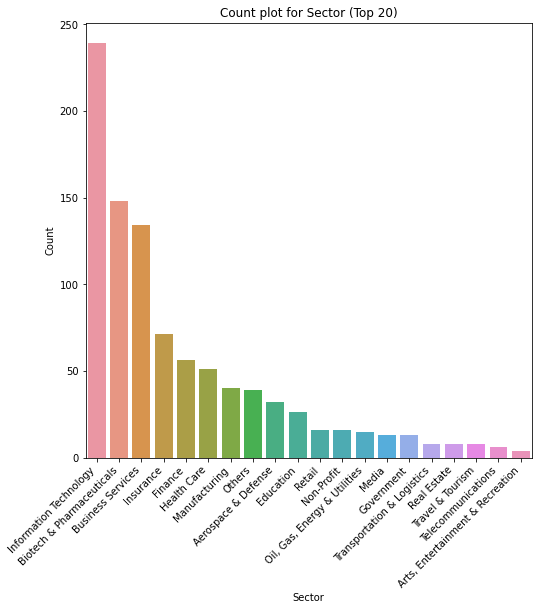

In [323]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Sector', data=df, order = df['Sector'].value_counts()[:20].index)
plt.title('Count plot for Sector (Top 20)')
plt.xlabel('Sector')
plt.ylabel('Count')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [324]:
df['Revenue'].value_counts()

Unknown / Non-Applicable            299
$10+ billion (USD)                  140
$100 to $500 million (USD)          107
$1 to $2 billion (USD)               68
$500 million to $1 billion (USD)     62
$25 to $50 million (USD)             59
$50 to $100 million (USD)            52
$2 to $5 billion (USD)               44
$10 to $25 million (USD)             39
$5 to $10 million (USD)              29
$5 to $10 billion (USD)              20
$1 to $5 million (USD)               17
-1                                   11
Less than $1 million (USD)            9
Name: Revenue, dtype: int64

In [325]:
df['Revenue']=df['Revenue'].apply(lambda x: 'Unknown / Non-Applicable' if x=='-1' else x)

[Text(0, 0, 'Unknown / Non-Applicable'),
 Text(1, 0, '$10+ billion (USD)'),
 Text(2, 0, '$100 to $500 million (USD)'),
 Text(3, 0, '$1 to $2 billion (USD)'),
 Text(4, 0, '$500 million to $1 billion (USD)'),
 Text(5, 0, '$25 to $50 million (USD)'),
 Text(6, 0, '$50 to $100 million (USD)'),
 Text(7, 0, '$2 to $5 billion (USD)'),
 Text(8, 0, '$10 to $25 million (USD)'),
 Text(9, 0, '$5 to $10 million (USD)'),
 Text(10, 0, '$5 to $10 billion (USD)'),
 Text(11, 0, '$1 to $5 million (USD)'),
 Text(12, 0, 'Less than $1 million (USD)')]

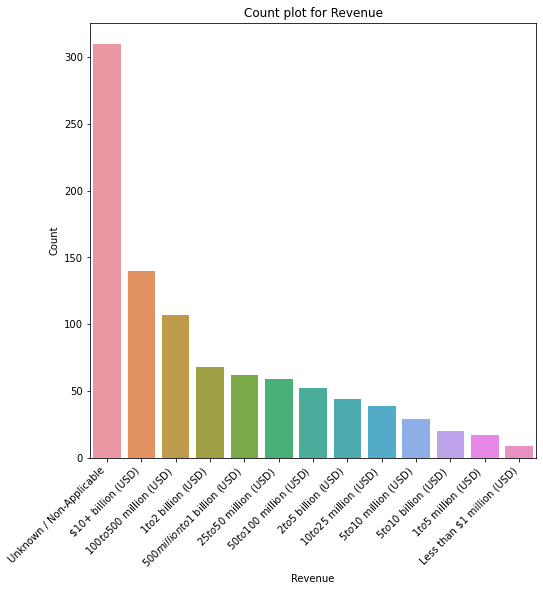

In [326]:
plt.figure(figsize=(8,8))
g=sns.countplot(x='Revenue', data=df, order = df['Revenue'].value_counts().index)
plt.title('Count plot for Revenue')
plt.xlabel('Revenue')
plt.ylabel('Count')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [327]:
df['Competitors'].value_counts()

-1                                                                                              634
Novartis, Baxter, Pfizer                                                                         14
Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory     12
Travelers, Allstate, State Farm                                                                  10
Roche, GlaxoSmithKline, Novartis                                                                  9
                                                                                               ... 
Slalom, Cognizant Technology Solutions, Deloitte                                                  1
Greystar, The Related Companies, Prometheus Real Estate Group                                     1
Ecolab, Eurofin Private Investment Office                                                         1
USAA, Navy Federal Credit Union, Raymond James Financial                                          1


In [328]:
df['Competitors']=df['Competitors'].apply(lambda x: len(x.split(',')) if x!='-1' else 0)

Text(0, 0.5, 'Count')

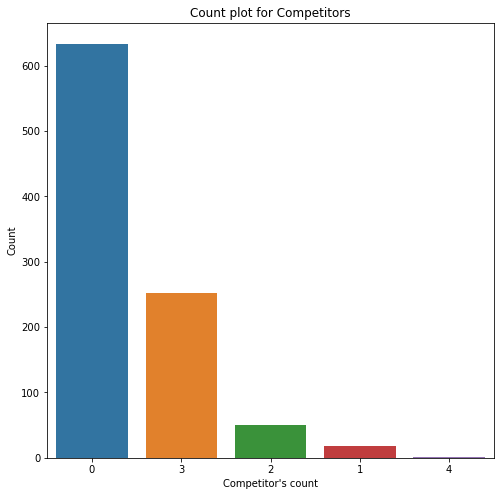

In [329]:
plt.figure(figsize=(8,8))
sns.countplot(x='Competitors', data=df, order = df['Competitors'].value_counts().index)
plt.title('Count plot for Competitors')
plt.xlabel("Competitor's count")
plt.ylabel('Count')

In [330]:
df.tail()

,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,job title,job seniority,Salary,job location
951,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Public,Internet,Information Technology,$100 to $500 million (USD),3,data engineer,sr,102.5,TN
952,$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,0,data scientist,other,73.5,PA
953,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC","Allentown, PA","Chadds Ford, PA",1 to 50 employees,1996,Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),0,manager,other,127.5,PA
954,-1,Loading...\n\nTitle: Data Engineer\n\nLocation...,4.8,IGNW,"Austin, TX","Portland, OR",201 to 500 employees,2015,Private,IT Services,Information Technology,$25 to $50 million (USD),1,data engineer,other,97.5,TX
955,$61K-$126K (Glassdoor est.),Returning Candidate? Log back in to the Career...,3.6,Riverside Research Institute,"Beavercreek, OH","Arlington, VA",501 to 1000 employees,1967,Nonprofit Organization,Federal Agencies,Government,$50 to $100 million (USD),0,data scientist,other,93.5,OH


Text(0.5, 1.0, 'Correlation matrix for Rating, Founded, and Salary columns')

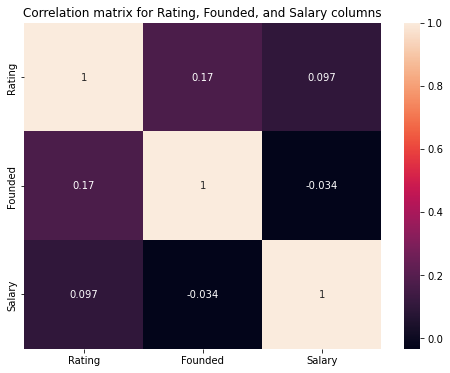

In [331]:
plt.figure(figsize=(8,6))
corr = df[['Rating','Founded','Salary']].corr()

sns.heatmap(corr , annot=True)
plt.title('Correlation matrix for Rating, Founded, and Salary columns')

Insight: Rating-Founded columns have positive correlation, whereas Salary-Founded columns have negative correlation. 
Also since the correlation is not high amongst all these numerical features, there is no case of multicolliniearity.

Feature Engineering

In [332]:
df['job in headquarters'] = df.apply(lambda x: 1 if x['Location']==x['Headquarters'] else 0 , axis=1)

Text(0, 0.5, 'count')

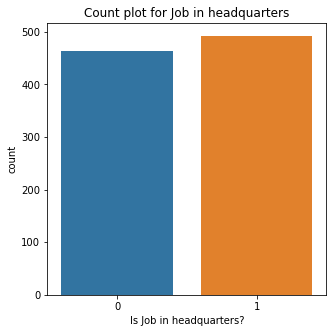

In [333]:
plt.figure(figsize=(5,5))
sns.countplot(x='job in headquarters',data=df)
plt.title('Count plot for Job in headquarters')
plt.xlabel("Is Job in headquarters?")
plt.ylabel('count')

In [334]:
df.drop(labels=['Location'], axis=1, inplace=True)

In [335]:
df['Job Description'][0]

'Data Scientist\nLocation: Albuquerque, NM\nEducation Required: Bachelor’s degree required, preferably in math, engineering, business, or the sciences.\nSkills Required:\nBachelor’s Degree in relevant field, e.g., math, data analysis, database, computer science, Artificial Intelligence (AI); three years’ experience credit for Master’s degree; five years’ experience credit for a Ph.D\nApplicant should be proficient in the use of Power BI, Tableau, Python, MATLAB, Microsoft Word, PowerPoint, Excel, and working knowledge of MS Access, LMS, SAS, data visualization tools, and have a strong algorithmic aptitude\nExcellent verbal and written communication skills, and quantitative analytical skills are required\nApplicant must be able to work in a team environment\nU.S. citizenship and ability to obtain a DoD Secret Clearance required\nResponsibilities: The applicant will be responsible for formulating analytical solutions to complex data problems; creating data analytic models to improve data

In [336]:
df['python_job'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df['excel_job'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
df['sql_job'] = df['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
df['tableau_job'] = df['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)

Text(0, 0.5, 'Count')

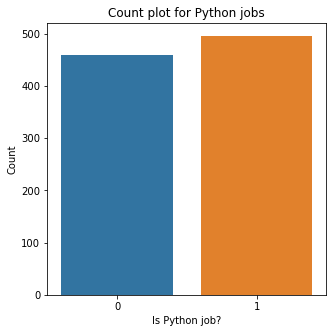

In [337]:
plt.figure(figsize=(5,5))
sns.countplot(x='python_job', data=df)
plt.title('Count plot for Python jobs')
plt.xlabel("Is Python job?")
plt.ylabel('Count')

Text(0, 0.5, 'Count')

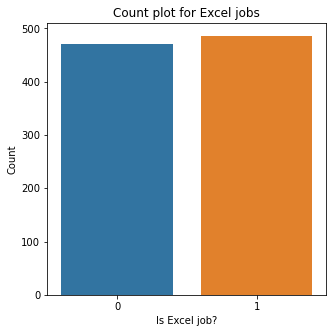

In [338]:
plt.figure(figsize=(5,5))
sns.countplot(x='excel_job', data=df)
plt.title('Count plot for Excel jobs')
plt.xlabel("Is Excel job?")
plt.ylabel('Count')

Text(0, 0.5, 'Count')

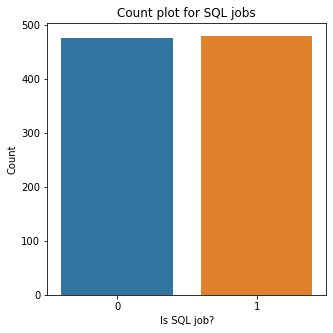

In [339]:
plt.figure(figsize=(5,5))
sns.countplot(x='sql_job', data=df)
plt.title('Count plot for SQL jobs')
plt.xlabel("Is SQL job?")
plt.ylabel('Count')

Text(0, 0.5, 'Count')

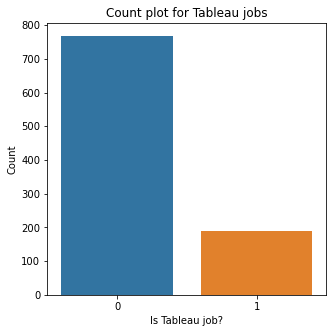

In [340]:
plt.figure(figsize=(5,5))
sns.countplot(x='tableau_job', data=df)
plt.title('Count plot for Tableau jobs')
plt.xlabel("Is Tableau job?")
plt.ylabel('Count')

In [341]:
df.drop(labels=['Job Description'], axis=1, inplace=True)

In [342]:
sector_list = list(df['Sector'].value_counts()[:10].index)

def sector_simplifier(text):
    if text not in sector_list:
        return 'Others'
    else:
        return text

df['Sector'] = df['Sector'].apply(sector_simplifier)

[Text(0, 0, 'Information Technology'),
 Text(1, 0, 'Others'),
 Text(2, 0, 'Biotech & Pharmaceuticals'),
 Text(3, 0, 'Business Services'),
 Text(4, 0, 'Insurance'),
 Text(5, 0, 'Finance'),
 Text(6, 0, 'Health Care'),
 Text(7, 0, 'Manufacturing'),
 Text(8, 0, 'Aerospace & Defense'),
 Text(9, 0, 'Education')]

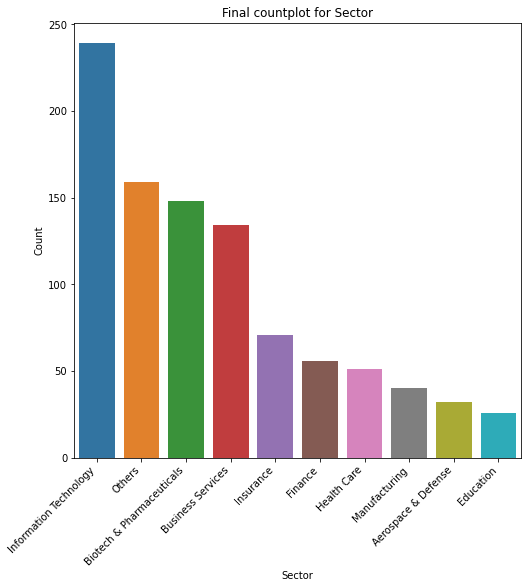

In [343]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Sector', data=df, order = df['Sector'].value_counts().index)
plt.title('Final countplot for Sector')
plt.xlabel('Sector')
plt.ylabel('Count')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [344]:
job_location_list = list(df['job location'].value_counts()[:9].index)

def job_location_simplifier(text):
    if text not in job_location_list:
        return 'Others'
    else:
        return text

df['job location'] = df['job location'].apply(job_location_simplifier)

Text(0, 0.5, 'Count')

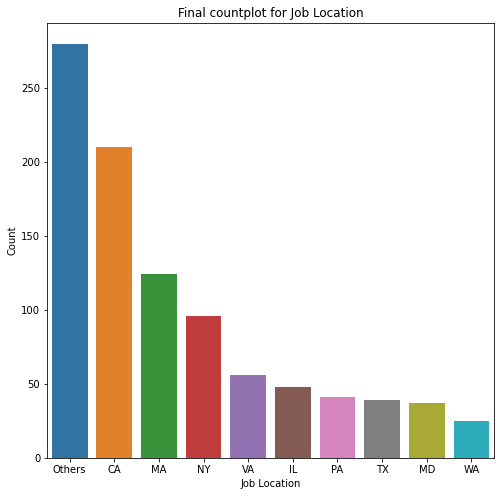

In [345]:
plt.figure(figsize=(8,8))
sns.countplot(x='job location', data=df, order = df['job location'].value_counts().index)
plt.title('Final countplot for Job Location')
plt.xlabel('Job Location')
plt.ylabel('Count')


In [346]:
df.drop(labels=['Salary Estimate', 'Company Name', 'Headquarters', 'Industry', 'job location'], axis=1, inplace=True)

In [347]:
df.columns

Index(['Rating', 'Size', 'Founded', 'Type of ownership', 'Sector', 'Revenue',
       'Competitors', 'job title', 'job seniority', 'Salary',
       'job in headquarters', 'python_job', 'excel_job', 'sql_job',
       'tableau_job'],
      dtype='object')

In [348]:
df.rename(columns={'Rating':'company_rating', 'Size':'company_size', 'Founded':'company_founded', 'Type of ownership':\
                   'type_of_ownership',
                   'Sector':'sector', 'Revenue':'revenue', 'Competitors':'competitors', 'Salary': 'salary'}, inplace=True)

Handling ordinal categorical features

In [349]:
#Ordinal features are categorical variables that have some order associated with them (e.g. size, rating, revenue, etc.)

In [350]:
size_map = {'Unknown': 0, '1 to 50 employees': 1, '51 to 200 employees': 2, '201 to 500 employees': 3,
            '501 to 1000 employees': 4, '1001 to 5000 employees': 5, '5001 to 10000 employees': 6, '10000+ employees': 7}

df['company_size'] = df['company_size'].map(size_map)

In [351]:
revenue_map = {'Unknown / Non-Applicable': 0, 'Less than $1 million (USD)': 1, '$1 to $5 million (USD)': 2, '$5 to $10 million (USD)': 3,
            '$10 to $25 million (USD)': 4, '$25 to $50 million (USD)': 5, '$50 to $100 million (USD)': 6, '$100 to $500 million (USD)': 7,
            '$500 million to $1 billion (USD)': 8, '$1 to $2 billion (USD)': 9, '$2 to $5 billion (USD)':10, '$5 to $10 billion (USD)':11,
            '$10+ billion (USD)':12}
df['revenue'] = df['revenue'].map(revenue_map)

In [352]:
job_seniority_map = {'other': 0, 'jr': 1, 'sr': 2}

df['job seniority'] = df['job seniority'].map(job_seniority_map)

Handling nominal categorical features


In [353]:
#Nominal features are categorical variables that have no numerical importance (e.g. occupation, name, etc.)

In [354]:
print('Before: {}'.format(df.shape))
df = pd.get_dummies(columns=['type_of_ownership'], data=df, prefix='ownership')
print('After: {}'.format(df.shape))

Before: (956, 15)
After: (956, 22)


In [355]:
print('Before: {}'.format(df.shape))
df = pd.get_dummies(columns=['sector'], data=df)
print('After: {}'.format(df.shape))

Before: (956, 22)
After: (956, 31)


In [356]:
print('Before: {}'.format(df.shape))
df = pd.get_dummies(columns=['job title'], data=df)
print('After: {}'.format(df.shape))

Before: (956, 31)
After: (956, 37)


In [357]:
df.drop(labels=['ownership_Other Organization', 'sector_Others', 'job title_other'], axis=1, inplace=True)

feature selection

In [358]:
X = df.drop('salary', axis=1)
y = df['salary']

In [359]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [360]:
fs= SelectKBest(score_func=mutual_info_regression,k='all')
fs.fit(X,y)

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x0000025ECA6050D0>)

[Text(0, 0, 'company_rating'),
 Text(1, 0, 'company_size'),
 Text(2, 0, 'company_founded'),
 Text(3, 0, 'revenue'),
 Text(4, 0, 'competitors'),
 Text(5, 0, 'job seniority'),
 Text(6, 0, 'job in headquarters'),
 Text(7, 0, 'python_job'),
 Text(8, 0, 'excel_job'),
 Text(9, 0, 'sql_job'),
 Text(10, 0, 'tableau_job'),
 Text(11, 0, 'ownership_College / University'),
 Text(12, 0, 'ownership_Government'),
 Text(13, 0, 'ownership_Hospital'),
 Text(14, 0, 'ownership_Nonprofit Organization'),
 Text(15, 0, 'ownership_Private'),
 Text(16, 0, 'ownership_Public'),
 Text(17, 0, 'ownership_Subsidiary or Business Segment'),
 Text(18, 0, 'sector_Aerospace & Defense'),
 Text(19, 0, 'sector_Biotech & Pharmaceuticals'),
 Text(20, 0, 'sector_Business Services'),
 Text(21, 0, 'sector_Education'),
 Text(22, 0, 'sector_Finance'),
 Text(23, 0, 'sector_Health Care'),
 Text(24, 0, 'sector_Information Technology'),
 Text(25, 0, 'sector_Insurance'),
 Text(26, 0, 'sector_Manufacturing'),
 Text(27, 0, 'job title_data

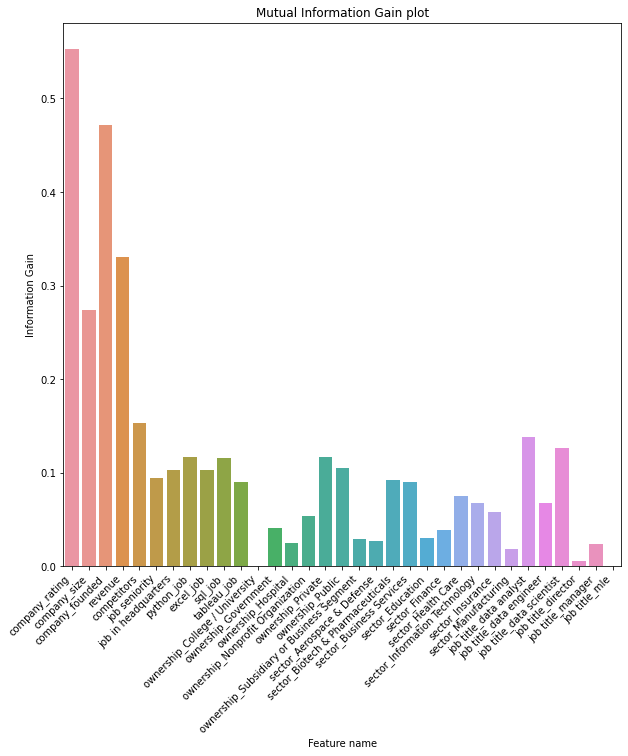

In [361]:
plt.figure(figsize=(10,10))
g=sns.barplot(x=X.columns,y=fs.scores_)
plt.title('Mutual Information Gain plot')
plt.xlabel('Feature name')
plt.ylabel('Information Gain')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [362]:
#From feature importance chart, it is evident that there are atleast 20 features that impact the target variable.

[Text(0, 0, 'company_rating'),
 Text(1, 0, 'company_founded'),
 Text(2, 0, 'revenue'),
 Text(3, 0, 'company_size'),
 Text(4, 0, 'competitors'),
 Text(5, 0, 'job title_data analyst'),
 Text(6, 0, 'job title_data scientist'),
 Text(7, 0, 'python_job'),
 Text(8, 0, 'ownership_Private'),
 Text(9, 0, 'sql_job'),
 Text(10, 0, 'ownership_Public'),
 Text(11, 0, 'excel_job'),
 Text(12, 0, 'job in headquarters'),
 Text(13, 0, 'job seniority'),
 Text(14, 0, 'sector_Biotech & Pharmaceuticals'),
 Text(15, 0, 'tableau_job'),
 Text(16, 0, 'sector_Business Services'),
 Text(17, 0, 'sector_Health Care'),
 Text(18, 0, 'sector_Information Technology'),
 Text(19, 0, 'job title_data engineer')]

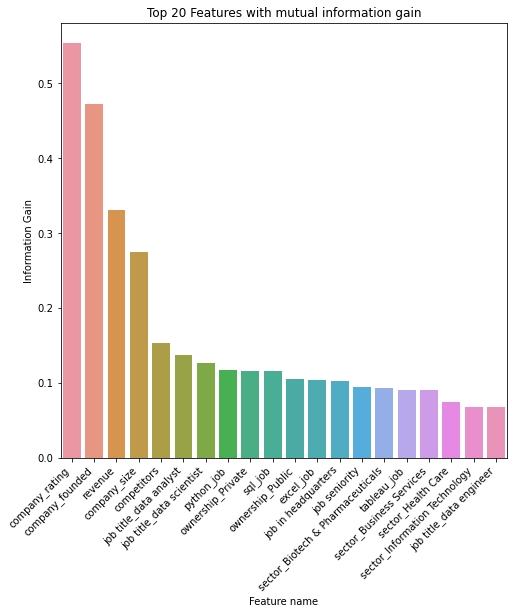

In [363]:
feature_imp = pd.DataFrame(fs.scores_,columns=['Score'],index=X.columns)
top_20_feature=feature_imp.nlargest(20,columns=['Score'])

plt.figure(figsize=(8,8))
g = sns.barplot(x=top_20_feature.index, y=top_20_feature['Score'])
plt.title('Top 20 Features with mutual information gain')
plt.xlabel('Feature name')
plt.ylabel('Information Gain')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

<AxesSubplot:>

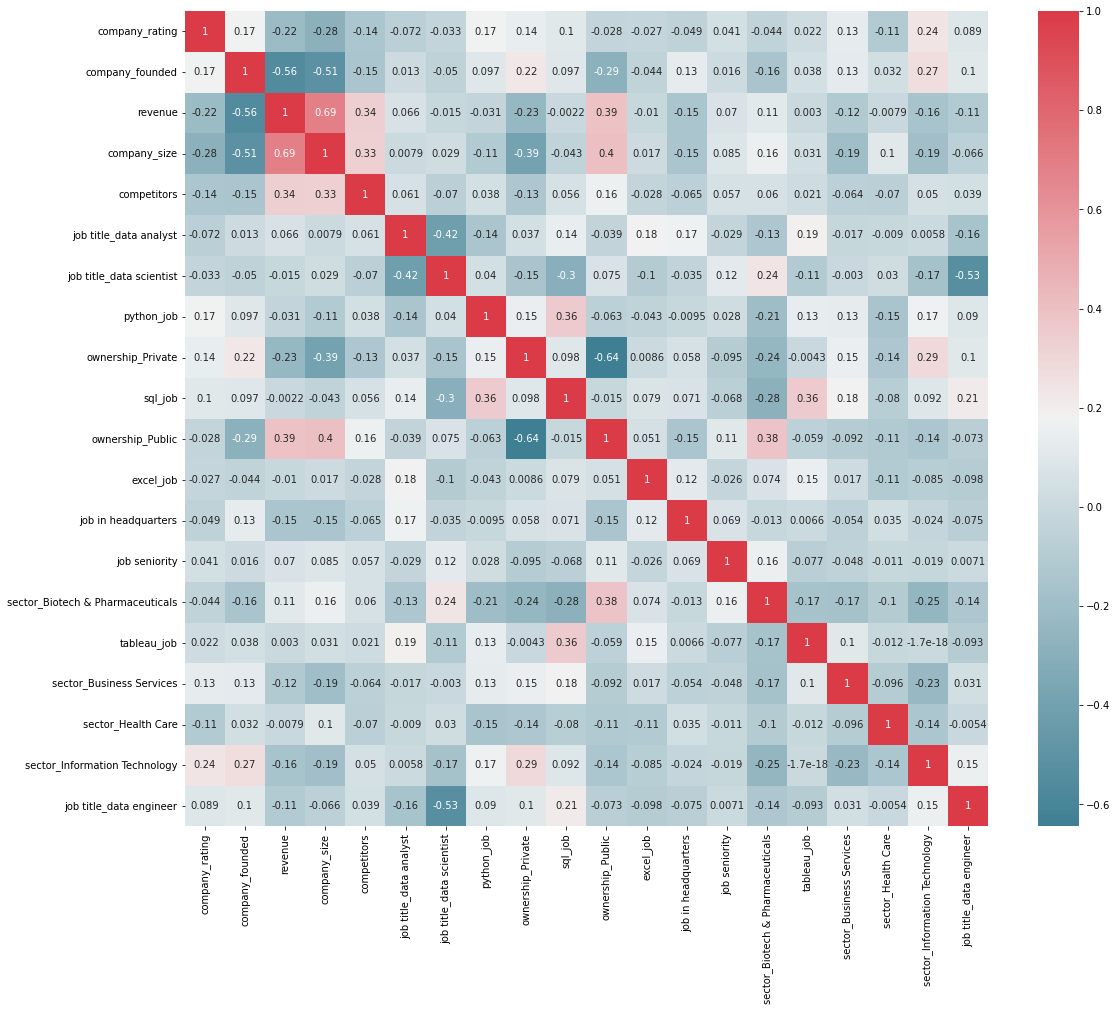

In [364]:
plt.figure(figsize=(18,15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
corr = X[top_20_feature.index].corr()

sns.heatmap(corr,annot=True,cmap=cmap)

In [365]:
#Range of correlation are as follows:

#Strong correlation: X > 0.7
#Moderate correlation: 0.5 < X < 0.7
#Weak correlation: X < 0.5

From the correlation matrix, it is evident that features (ownership_Public, ownership_Private), (company_size, company_founded),
(job_title_data engineer, job_title_data scientist) and (company_founded, revenue) are moderately correlated. Hence, dropping 
'Revenue', 'ownership_Public', 'job title_data engineer' and 'company_size' features.

In [366]:
X = X[top_20_feature.index]
X.drop(labels=['ownership_Public', 'company_size', 'revenue', 'job title_data engineer'], axis=1, inplace=True)

Text(0.5, 1.0, 'Correlation matrix after removing highly correlated features')

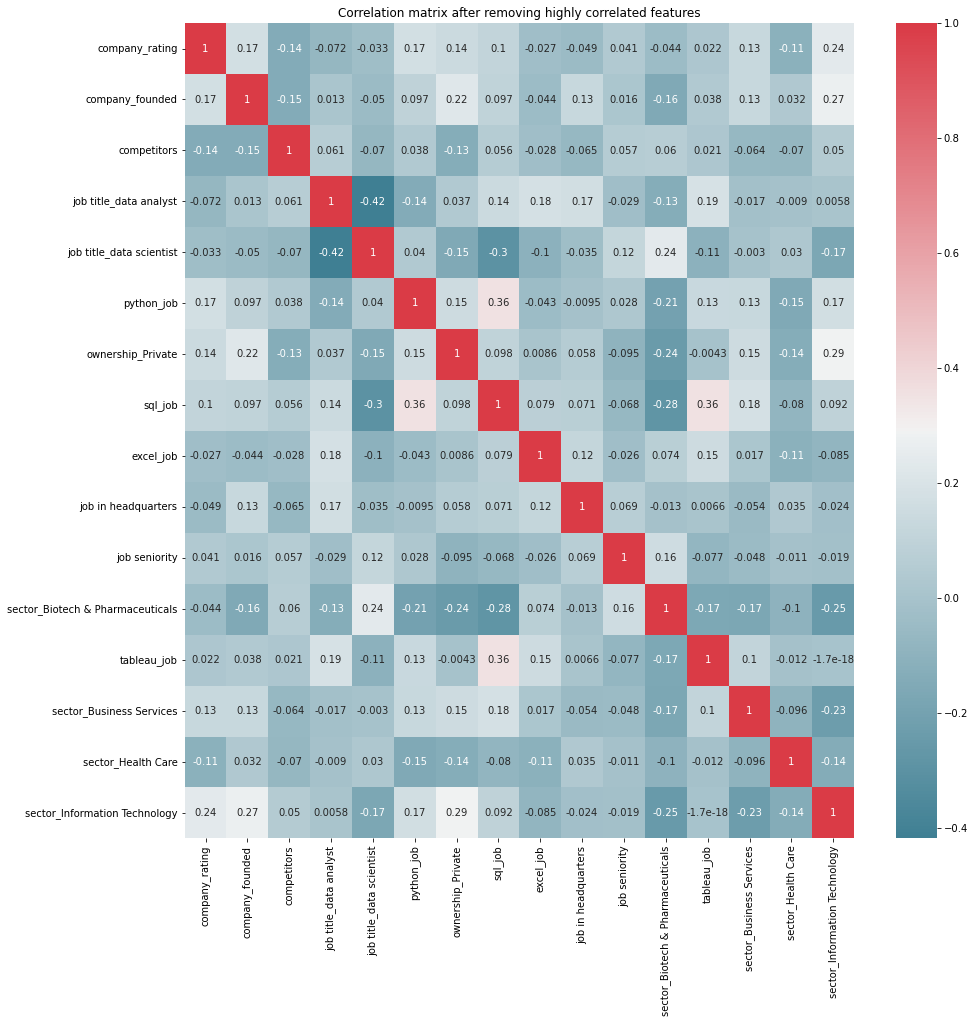

In [367]:
plt.figure(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(X.corr(),annot=True,cmap=cmap)
plt.title('Correlation matrix after removing highly correlated features')

In [368]:
X.columns

Index(['company_rating', 'company_founded', 'competitors',
       'job title_data analyst', 'job title_data scientist', 'python_job',
       'ownership_Private', 'sql_job', 'excel_job', 'job in headquarters',
       'job seniority', 'sector_Biotech & Pharmaceuticals', 'tableau_job',
       'sector_Business Services', 'sector_Health Care',
       'sector_Information Technology'],
      dtype='object')

In [369]:
X = X[['company_rating', 'company_founded', 'competitors', 'sector_Biotech & Pharmaceuticals',
       'sector_Health Care', 'sector_Business Services', 'sector_Information Technology',
       'ownership_Private',
       'job title_data scientist', 'job title_data analyst', 'job seniority', 'job in headquarters',
       'excel_job', 'python_job', 'tableau_job', 'sql_job',]]

In [370]:
X.head()

,company_rating,company_founded,competitors,sector_Biotech & Pharmaceuticals,sector_Health Care,sector_Business Services,sector_Information Technology,ownership_Private,job title_data scientist,job title_data analyst,job seniority,job in headquarters,excel_job,python_job,tableau_job,sql_job
0,3.8,1973,0,0,0,0,0,1,1,0,0,0,1,1,1,0
1,3.4,1984,0,0,1,0,0,0,1,0,0,0,0,1,0,0
2,4.8,2010,0,0,0,1,0,1,1,0,0,1,1,1,0,1
3,3.8,1965,3,0,0,0,0,0,1,0,0,1,0,1,0,0
4,2.9,1998,3,0,0,1,0,1,1,0,0,1,1,1,0,1


In [371]:
from sklearn.preprocessing import StandardScaler
x_prev=X.copy()

sc_rating = StandardScaler()
X['company_rating'] = sc_rating.fit_transform(X[['company_rating']])

sc_founded = StandardScaler()
X['company_founded'] = sc_founded.fit_transform(X[['company_founded']])

In [372]:
X.head()

,company_rating,company_founded,competitors,sector_Biotech & Pharmaceuticals,sector_Health Care,sector_Business Services,sector_Information Technology,ownership_Private,job title_data scientist,job title_data analyst,job seniority,job in headquarters,excel_job,python_job,tableau_job,sql_job
0,0.048588,-0.086728,0,0,0,0,0,1,1,0,0,0,1,1,1,0
1,-0.620043,0.138799,0,0,1,0,0,0,1,0,0,0,0,1,0,0
2,1.720165,0.671863,0,0,0,1,0,1,1,0,0,1,1,1,0,1
3,0.048588,-0.250748,3,0,0,0,0,0,1,0,0,1,0,1,0,0
4,-1.455831,0.425833,3,0,0,1,0,1,1,0,0,1,1,1,0,1


Text(0.5, 1.0, 'after scaling')

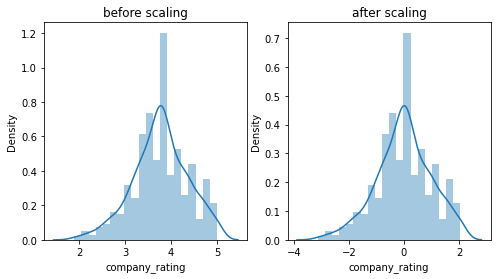

In [373]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
sns.distplot(a=x_prev['company_rating'])
plt.title('before scaling')

plt.subplot(1,2,2)
sns.distplot(a=X['company_rating'])
plt.title('after scaling')

In [374]:
#Feature Scaling doesnot change the distribution of the data, it only reduces the scale of that particular feature.

Text(0.5, 1.0, 'after scaling')

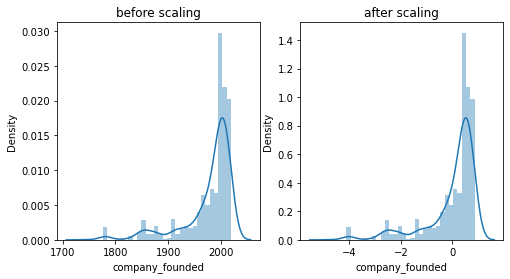

In [375]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
sns.distplot(a=x_prev['company_founded'])
plt.title('before scaling')

plt.subplot(1,2,2)
sns.distplot(a=X['company_founded'])
plt.title('after scaling')

MODEL BUILDING AND EVALUATION

In [376]:
from sklearn.model_selection import cross_val_score

In [377]:
#fitting linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
cv = cross_val_score(lr,X,y,cv=10,scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average NRMSE: -27.523 ---
Standard Deviation: 2.307


In [378]:
# Fitting Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso()
cv = cross_val_score(lasso, X, y, cv=10, scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average NRMSE: -27.993 ---
Standard Deviation: 1.796


In [379]:
# Fitting Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
cv = cross_val_score(rf, X, y, cv=10, scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average NRMSE: -17.754 ---
Standard Deviation: 5.256


In [380]:
#Random Forest becauseit has the highest value for Negative Root Mean Squared Error (NRMSE) 

In [381]:
rf = RandomForestRegressor()
rf.fit(X, y)

RandomForestRegressor()

In [382]:
def predict_salary(rating,founded,competitors,sector,ownership,job_title,job_seniority,job_in_headquarters,job_skills):
   
    prediction_input=list()
    prediction_input.append(sc_rating.transform(np.array(rating).reshape(1,-1)))
    prediction_input.append(sc_founded.transform(np.array(founded).reshape(1,-1)))
    prediction_input.append(competitors)
    print(prediction_input)
    sector_columns = ['sector_Biotech & Pharmaceuticals', 'sector_Health Care',
                    'sector_Business Services','sector_Information Technology']
    temp = list(map(int,np.zeros(shape=(1,len(sector_columns)))[0]))
    
    for index in range(0,len(sector_columns)):
        if sector_columns[index]=='sector_' + sector:
            temp[index]=1
            break
    prediction_input=prediction_input+temp
        
    if ownership=='Private':
        prediction_input.append(1)
    else:
        prediction_input.append(0)
    
    job_title_columns = ['job title_data scientist', 'job title_data analyst']
    temp = list(map(int , np.zeros(shape=(1,len(job_title_columns)))[0]))
    for index in range(0,len(job_title_columns)):
        if job_title_columns[index]=='job title_'+job_title:
            temp[index]=1
            break
    prediction_input=prediction_input+temp
    
    job_seniority_map = {'other': 0, 'jr': 1, 'sr': 2}
    prediction_input.append(job_seniority_map[job_seniority])
    
    prediction_input.append(job_in_headquarters)
    
    temp = list(map(int, np.zeros(shape=(1, 4))[0]))
    if 'excel' in job_skills:
        temp[0] = 1
    if 'python' in job_skills:
        temp[1] = 1
    if 'tableau' in job_skills:
        temp[2] = 1
    if 'sql' in job_skills:
        temp[3] = 1
    prediction_input = prediction_input + temp
    print(prediction_input)
    return rf.predict([prediction_input])[0]
    
    
    

In [383]:
# Prediction 1
# Input sequence: 'company_rating', 'company_founded', 'competitors_count',
#                 'company_sector', 'company_ownership', 'job_title', 'job_in_headquarters',
#                 'job_seniority', 'job_skills'

salary = predict_salary(4.5, 1969, 3, 'Information Technology', 'Private', 'data scientist', 'sr', 1, ['python', 'sql', 'tableau'])
print('Estimated salary (range): {}(USD) to {}(USD) per annum.'.format(int(salary*1000)-9000, int(salary*1000)+9000))

[array([[1.21869204]]), array([[-0.16873779]]), 3]
[array([[1.21869204]]), array([[-0.16873779]]), 3, 0, 0, 0, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1]
Estimated salary (range): 120050(USD) to 138050(USD) per annum.


In [384]:
# Prediction 2
# Input sequence: 'company_rating', 'company_founded', 'competitors_count',
#                 'company_sector', 'company_ownership', 'job_title', 'job_in_headquarters',
#                 'job_seniority', 'job_skills'

salary = predict_salary(3.0, 2000, 1, 'Health Care', 'Public', 'data analyst','jr', 0, ['python', 'tableau'])
print('Estimated salary (range): {}(USD) to {}(USD) per annum.'.format(int(salary*1000)-9000, int(salary*1000)+9000))

[array([[-1.28867346]]), array([[0.46683836]]), 1]
[array([[-1.28867346]]), array([[0.46683836]]), 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0]
Estimated salary (range): 62705(USD) to 80705(USD) per annum.


In [385]:
import pickle
pickle.dump(rf,open("salary_prediction_model.pickle",'wb'))